In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import torch
#pip install git+https://github.com/KindXiaoming/pykan.git
import sys

In [2]:
import random
import numpy as np
import torch
import os

def set_global_seed(seed=42):
    """Set seed for reproducibility across NumPy, PyTorch, and OS operations."""
    
    # Set Python random seed
    random.seed(seed)
    
    # Set NumPy random seed
    np.random.seed(seed)
    
    # Set PyTorch random seed
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)  # If using CUDA
    
    # Ensure deterministic behavior in PyTorch (optional, can slow training)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    
    # Set environment variable for other libraries
    os.environ["PYTHONHASHSEED"] = str(seed)

# Set global seed
set_global_seed(42)


In [3]:
import os
import pandas as pd

# Set the path to your directory
data_dir = r"C:\Users\TESTER\OneDrive\Ambiente de Trabalho\Tese\Datasets\CICS2017 Dataset\TrafficLabelling"

# Initialize an empty list to collect DataFrames
all_dfs = []

for filename in os.listdir(data_dir):
    if filename.endswith(".pcap_ISCX") or filename.endswith(".csv"):
        file_path = os.path.join(data_dir, filename)
        try:
            df = pd.read_csv(file_path, encoding="utf-8", low_memory=False)
        except UnicodeDecodeError:
            print(f"UTF-8 failed for {filename}, trying ISO-8859-1...")
            try:
                df = pd.read_csv(file_path, encoding="ISO-8859-1", low_memory=False)
            except Exception as e:
                print(f"Still couldn't read {filename}: {e}")
                continue  # Skip the file if still failing

        df["source_file"] = filename
        all_dfs.append(df)

combined_df = pd.concat(all_dfs, ignore_index=True)

# Show a preview
print("Combined DataFrame shape:", combined_df.shape)
print(combined_df.head())


UTF-8 failed for Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv, trying ISO-8859-1...
Combined DataFrame shape: (3119345, 86)
                                   Flow ID       Source IP   Source Port  \
0  192.168.10.5-104.16.207.165-54865-443-6  104.16.207.165         443.0   
1    192.168.10.5-104.16.28.216-55054-80-6   104.16.28.216          80.0   
2    192.168.10.5-104.16.28.216-55055-80-6   104.16.28.216          80.0   
3  192.168.10.16-104.17.241.25-46236-443-6   104.17.241.25         443.0   
4  192.168.10.5-104.19.196.102-54863-443-6  104.19.196.102         443.0   

   Destination IP   Destination Port   Protocol      Timestamp  \
0    192.168.10.5            54865.0        6.0  7/7/2017 3:30   
1    192.168.10.5            55054.0        6.0  7/7/2017 3:30   
2    192.168.10.5            55055.0        6.0  7/7/2017 3:30   
3   192.168.10.16            46236.0        6.0  7/7/2017 3:30   
4    192.168.10.5            54863.0        6.0  7/7/2017 3:30   

    Flow Dur

In [4]:
combined_df.dropna(inplace=True)

In [5]:
train_data = combined_df

In [7]:
columns_numeric = train_data.select_dtypes(include="number").columns

In [8]:
Y = train_data[train_data.columns[-2]]

In [9]:
Y

0          BENIGN
1          BENIGN
2          BENIGN
3          BENIGN
4          BENIGN
            ...  
3119340    BENIGN
3119341    BENIGN
3119342    BENIGN
3119343    BENIGN
3119344    BENIGN
Name:  Label, Length: 2829385, dtype: object

In [10]:
len(columns_numeric)

80

In [11]:
X = train_data
for col in train_data.columns:
    if col not in columns_numeric:
        X.drop(columns = col, inplace = True)

In [12]:
X

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,443.0,54865.0,6.0,3.0,2.0,0.0,12.0,0.0,6.0,6.0,...,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,80.0,55054.0,6.0,109.0,1.0,1.0,6.0,6.0,6.0,6.0,...,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,80.0,55055.0,6.0,52.0,1.0,1.0,6.0,6.0,6.0,6.0,...,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,443.0,46236.0,6.0,34.0,1.0,1.0,6.0,6.0,6.0,6.0,...,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,443.0,54863.0,6.0,3.0,2.0,0.0,12.0,0.0,6.0,6.0,...,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3119340,51114.0,53.0,17.0,32215.0,4.0,2.0,112.0,152.0,28.0,28.0,...,3.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3119341,24054.0,53.0,17.0,324.0,2.0,2.0,84.0,362.0,42.0,42.0,...,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3119342,443.0,58030.0,6.0,82.0,2.0,1.0,31.0,6.0,31.0,0.0,...,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3119343,51694.0,53.0,17.0,1048635.0,6.0,2.0,192.0,256.0,32.0,32.0,...,5.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
columns_numeric = [
    col for col in columns_numeric
    if not len(train_data[col].value_counts()) < 2
]

In [23]:
len(columns_numeric)

62

In [15]:
train_data

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,443.0,54865.0,6.0,3.0,2.0,0.0,12.0,0.0,6.0,6.0,...,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,80.0,55054.0,6.0,109.0,1.0,1.0,6.0,6.0,6.0,6.0,...,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,80.0,55055.0,6.0,52.0,1.0,1.0,6.0,6.0,6.0,6.0,...,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,443.0,46236.0,6.0,34.0,1.0,1.0,6.0,6.0,6.0,6.0,...,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,443.0,54863.0,6.0,3.0,2.0,0.0,12.0,0.0,6.0,6.0,...,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3119340,51114.0,53.0,17.0,32215.0,4.0,2.0,112.0,152.0,28.0,28.0,...,3.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3119341,24054.0,53.0,17.0,324.0,2.0,2.0,84.0,362.0,42.0,42.0,...,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3119342,443.0,58030.0,6.0,82.0,2.0,1.0,31.0,6.0,31.0,0.0,...,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3119343,51694.0,53.0,17.0,1048635.0,6.0,2.0,192.0,256.0,32.0,32.0,...,5.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
train_data.columns

Index([' Source Port', ' Destination Port', ' Protocol', ' Flow Duration',
       ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length',
       ' Packet Length Mean', ' Packet Length Std',

C:\Users\TESTER\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


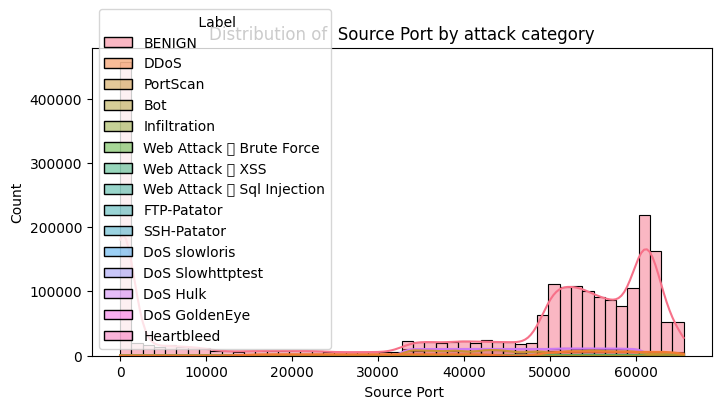

C:\Users\TESTER\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


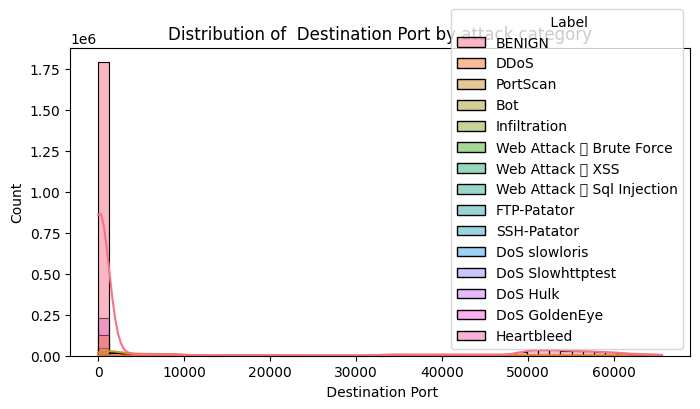

C:\Users\TESTER\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


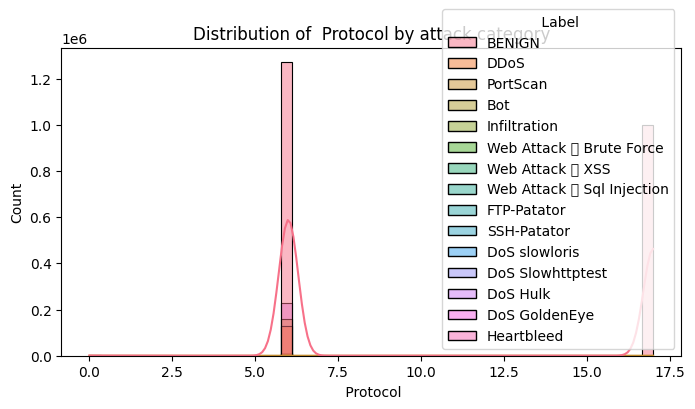

C:\Users\TESTER\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


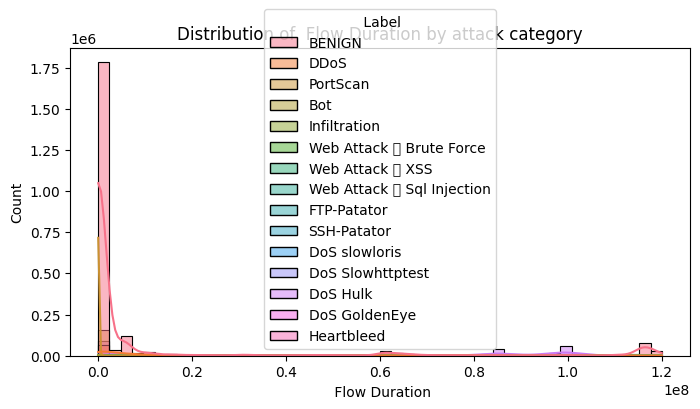

C:\Users\TESTER\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


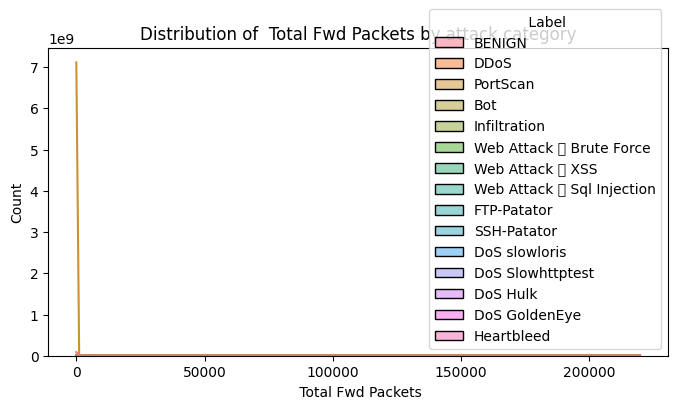

C:\Users\TESTER\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


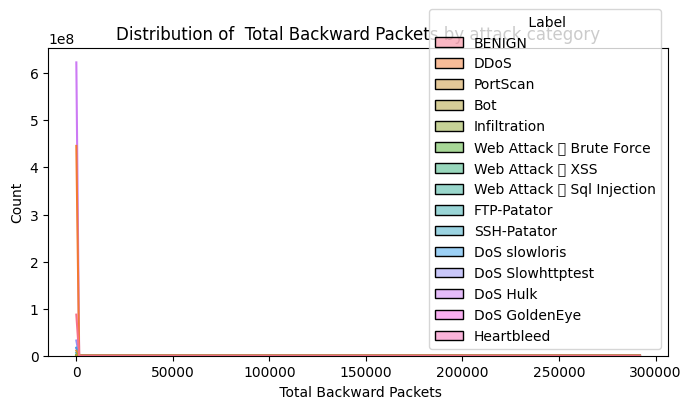

C:\Users\TESTER\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


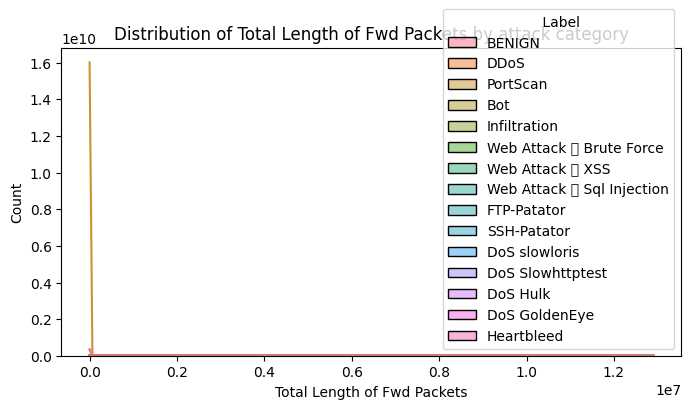

C:\Users\TESTER\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


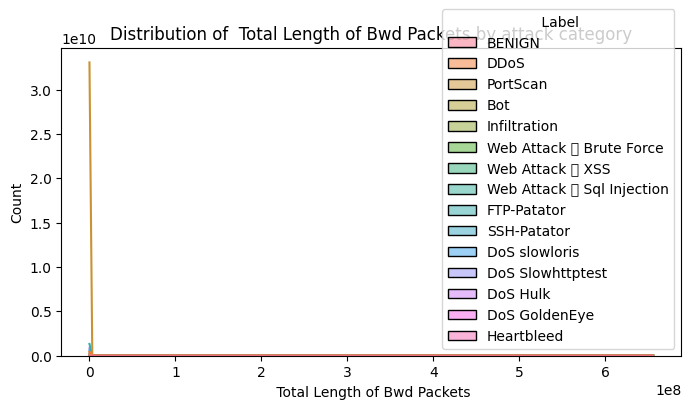

C:\Users\TESTER\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


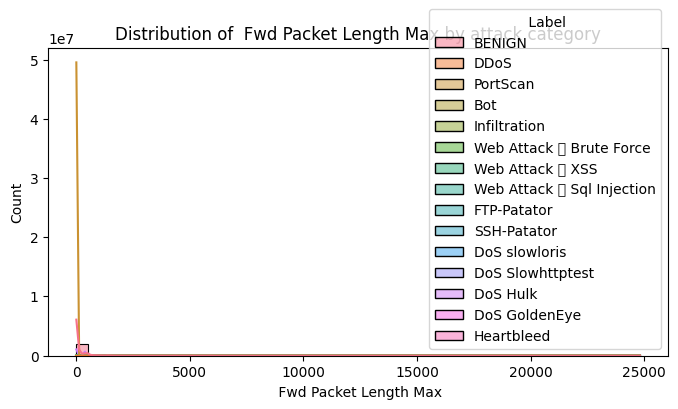

C:\Users\TESTER\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


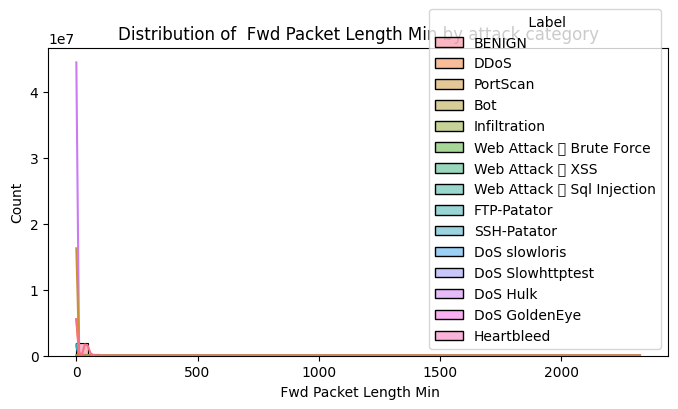

C:\Users\TESTER\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


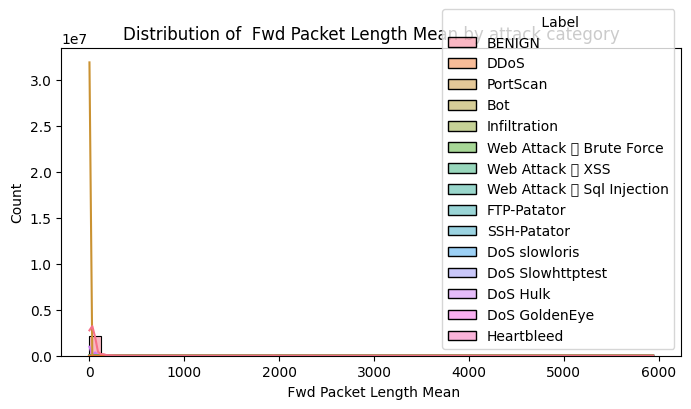

C:\Users\TESTER\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


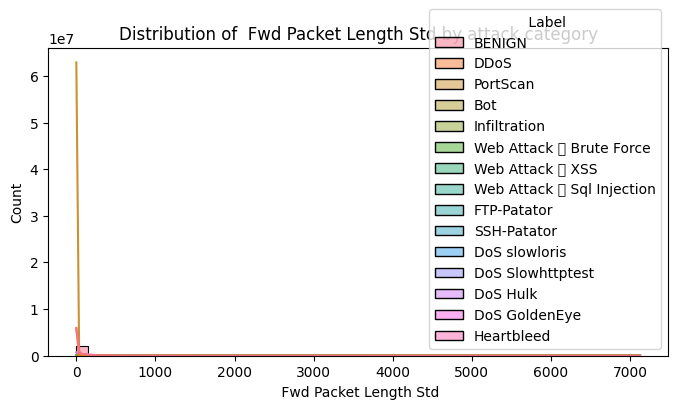

C:\Users\TESTER\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


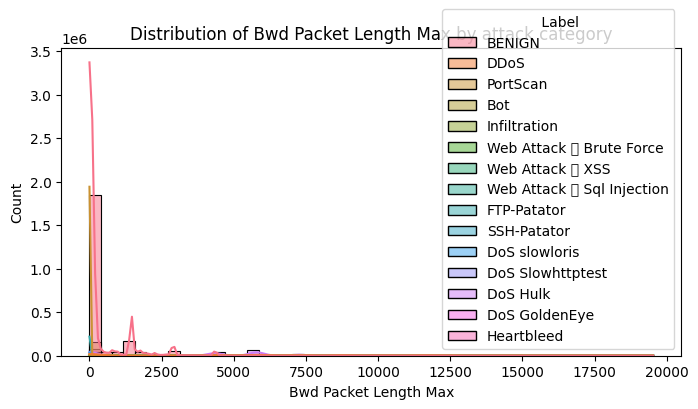

C:\Users\TESTER\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


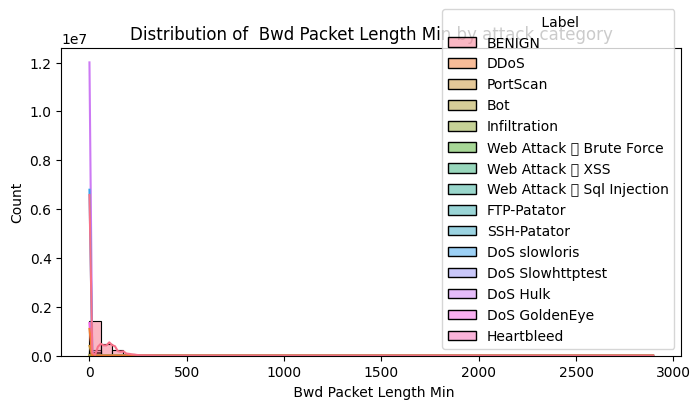

C:\Users\TESTER\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


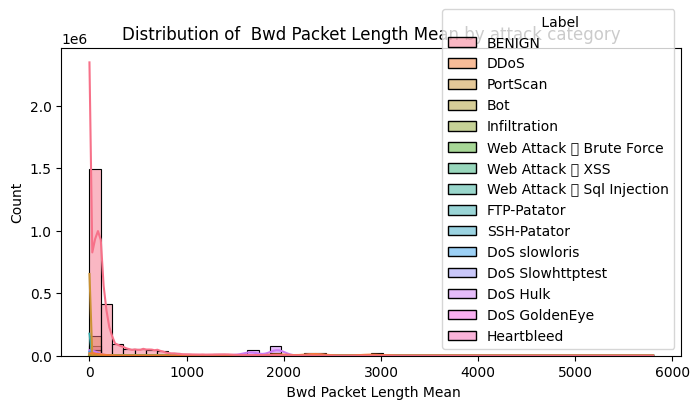

C:\Users\TESTER\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


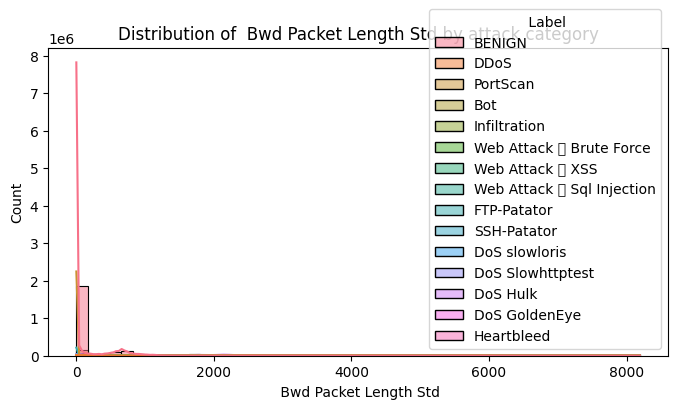

C:\Users\TESTER\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


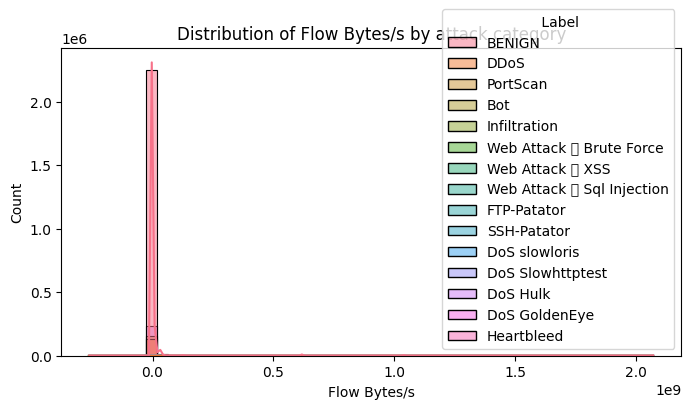

C:\Users\TESTER\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


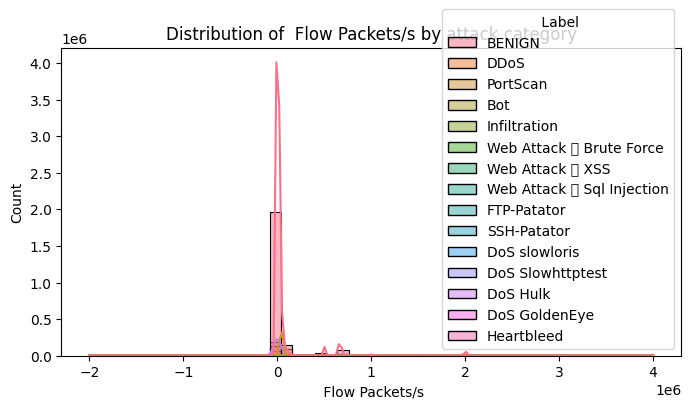

C:\Users\TESTER\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


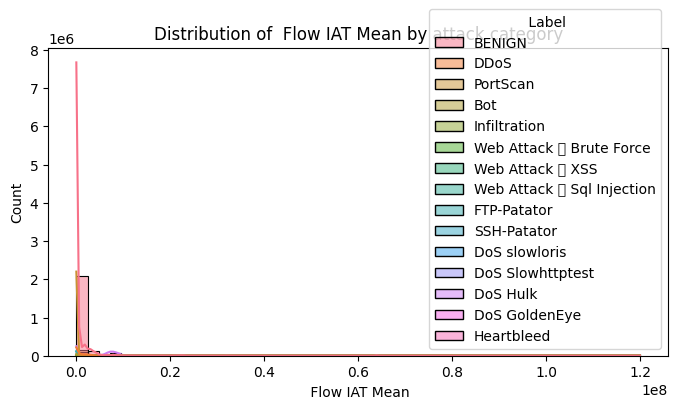

C:\Users\TESTER\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


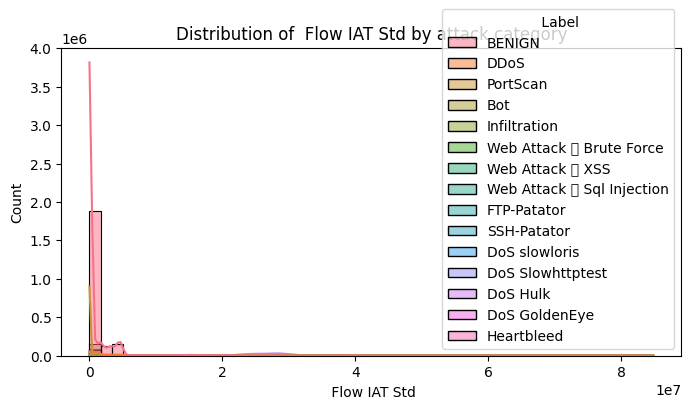

C:\Users\TESTER\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


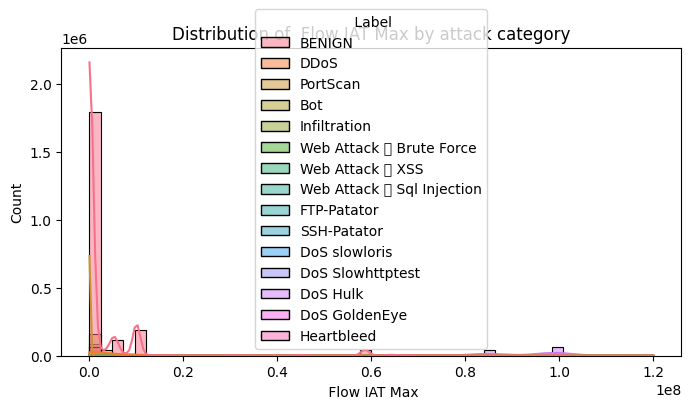

C:\Users\TESTER\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


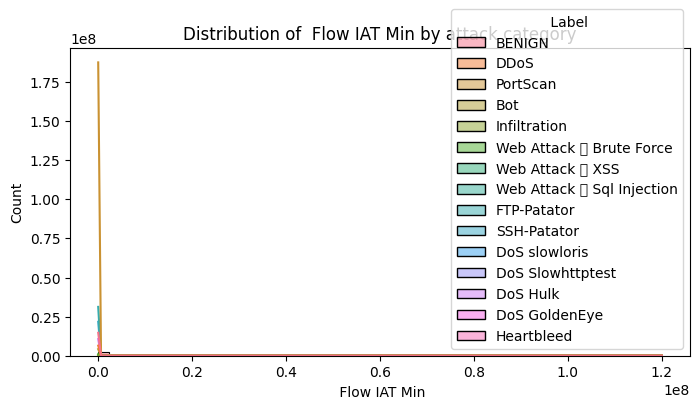

C:\Users\TESTER\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


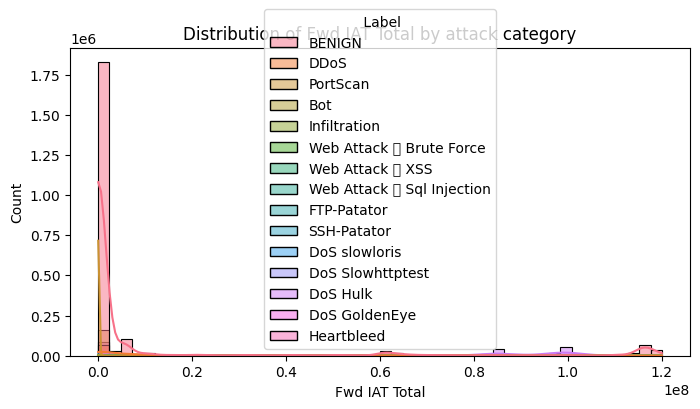

C:\Users\TESTER\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


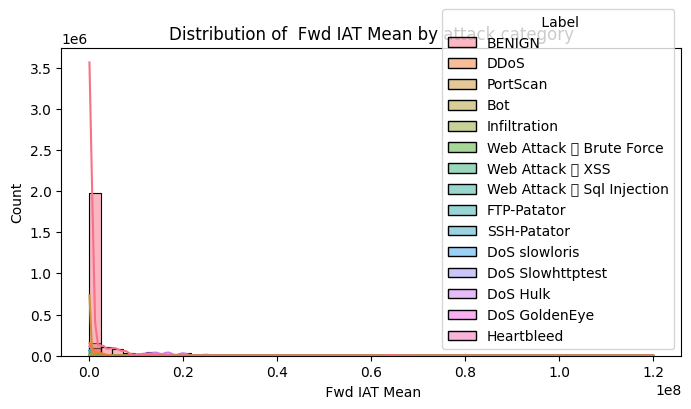

C:\Users\TESTER\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


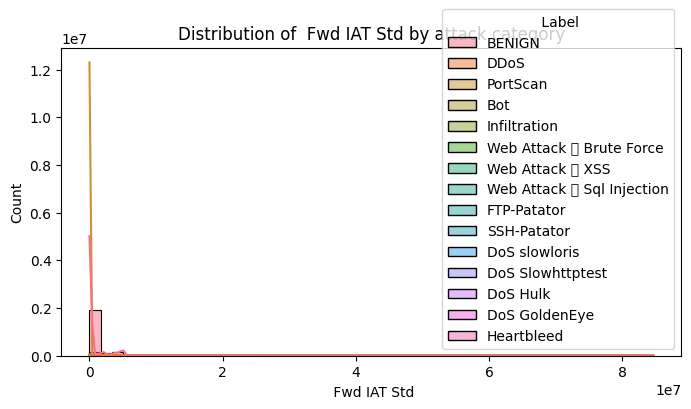

C:\Users\TESTER\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


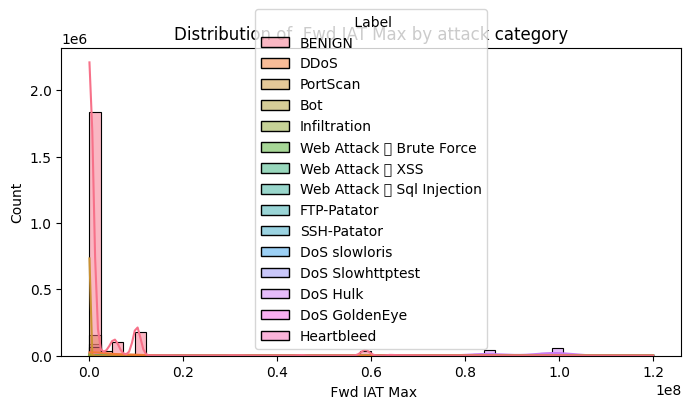

C:\Users\TESTER\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


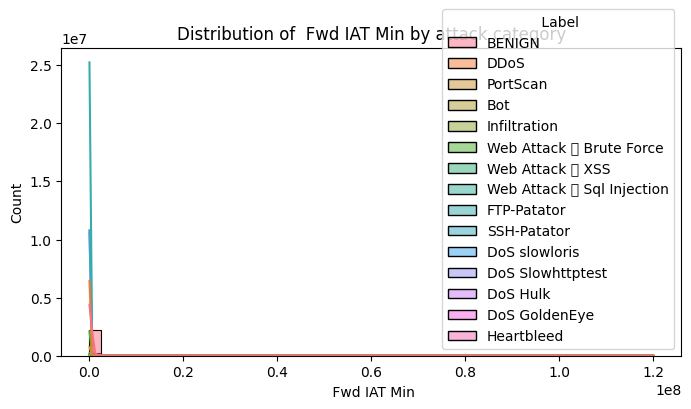

C:\Users\TESTER\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


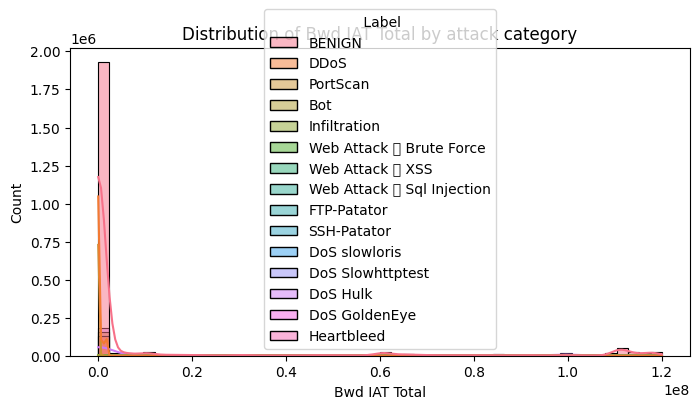

C:\Users\TESTER\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


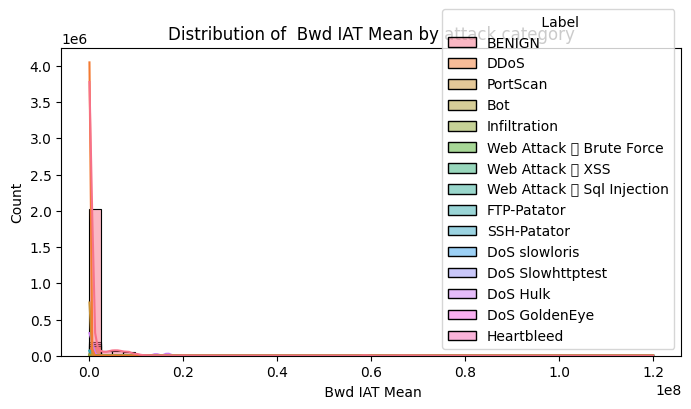

C:\Users\TESTER\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


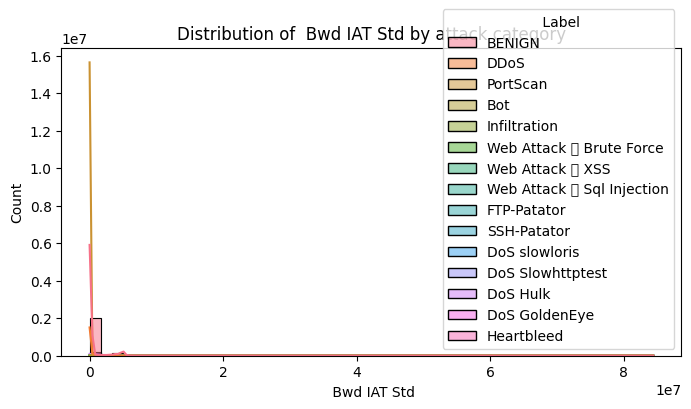

C:\Users\TESTER\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


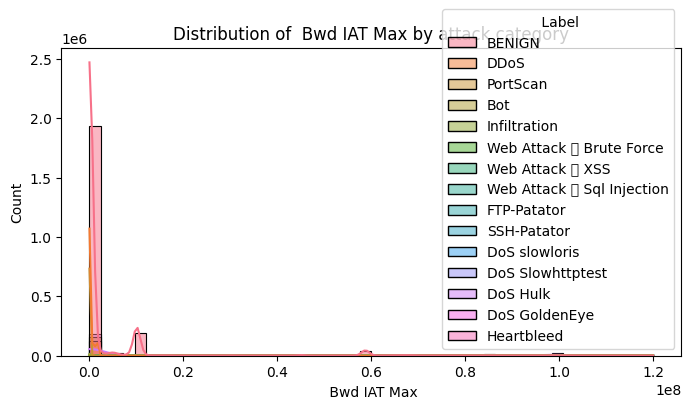

C:\Users\TESTER\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


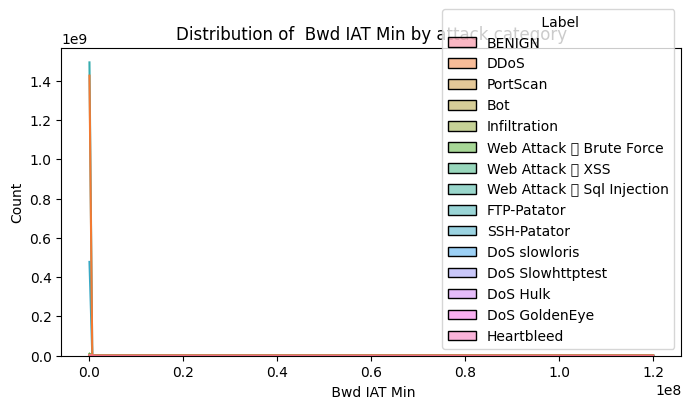

C:\Users\TESTER\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


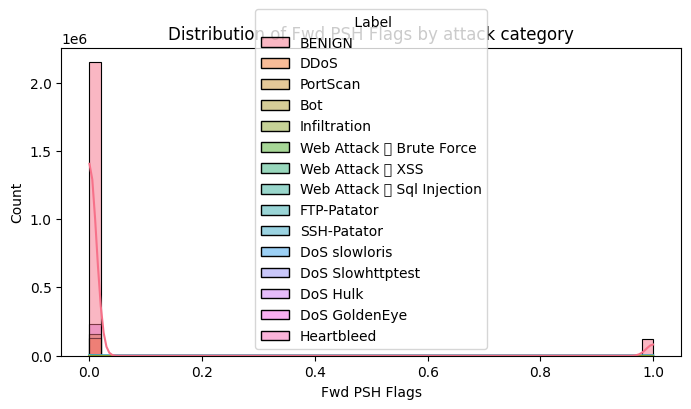

LinAlgError: The data appears to lie in a lower-dimensional subspace of the space in which it is expressed. This has resulted in a singular data covariance matrix, which cannot be treated using the algorithms implemented in `gaussian_kde`. Consider performing principle component analysis / dimensionality reduction and using `gaussian_kde` with the transformed data.

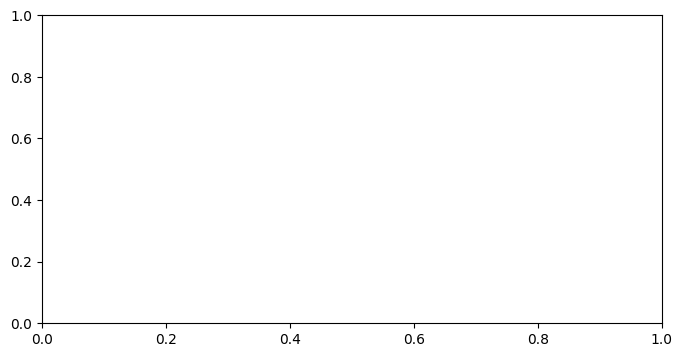

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Loop through each numerical column and plot histogram with hue
for col in train_data.columns:
    plt.figure(figsize=(8, 4))  # Set figure size
    sns.histplot(data=train_data, x=col, hue=Y, kde=True, bins=50)
    plt.title(f"Distribution of {col} by attack category")
    plt.show()


In [18]:
train_data_objects = X.select_dtypes(include = ["object"])

# Data Preprocessing

## Outlier Treatment

In [ ]:
fig, axes = plt.subplots(20,2, figsize=(20,40), tight_layout=True)
axes = axes.flatten()

for col,ax in zip(columns_numeric, axes):
    g = sns.boxplot(data = X, y = col, x = Y, hue =Y, ax = ax, legend=False)
    g.set_title(f"Boxplot for {col}")
    
[fig.delaxes(ax) for ax in axes.flatten() if not ax.has_data()]

plt.show()
    

## Normalizing and Scaling

In [38]:
import os
import pandas as pd

# Set the path to your directory
data_dir = r"C:\Users\TESTER\OneDrive\Ambiente de Trabalho\Tese\Datasets\CICS2017 Dataset\TrafficLabelling"

# Initialize an empty list to collect DataFrames
all_dfs = []

for filename in os.listdir(data_dir):
    if filename.endswith(".pcap_ISCX") or filename.endswith(".csv"):
        file_path = os.path.join(data_dir, filename)
        try:
            df = pd.read_csv(file_path, encoding="utf-8", low_memory=False)
        except UnicodeDecodeError:
            print(f"UTF-8 failed for {filename}, trying ISO-8859-1...")
            try:
                df = pd.read_csv(file_path, encoding="ISO-8859-1", low_memory=False)
            except Exception as e:
                print(f"Still couldn't read {filename}: {e}")
                continue  # Skip the file if still failing

        df["source_file"] = filename
        all_dfs.append(df)

combined_df = pd.concat(all_dfs, ignore_index=True)

# Show a preview
print("Combined DataFrame shape:", combined_df.shape)
print(combined_df.head())


UTF-8 failed for Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv, trying ISO-8859-1...
Combined DataFrame shape: (3119345, 86)
                                   Flow ID       Source IP   Source Port  \
0  192.168.10.5-104.16.207.165-54865-443-6  104.16.207.165         443.0   
1    192.168.10.5-104.16.28.216-55054-80-6   104.16.28.216          80.0   
2    192.168.10.5-104.16.28.216-55055-80-6   104.16.28.216          80.0   
3  192.168.10.16-104.17.241.25-46236-443-6   104.17.241.25         443.0   
4  192.168.10.5-104.19.196.102-54863-443-6  104.19.196.102         443.0   

   Destination IP   Destination Port   Protocol      Timestamp  \
0    192.168.10.5            54865.0        6.0  7/7/2017 3:30   
1    192.168.10.5            55054.0        6.0  7/7/2017 3:30   
2    192.168.10.5            55055.0        6.0  7/7/2017 3:30   
3   192.168.10.16            46236.0        6.0  7/7/2017 3:30   
4    192.168.10.5            54863.0        6.0  7/7/2017 3:30   

    Flow Dur

In [39]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3119345 entries, 0 to 3119344
Data columns (total 86 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   Flow ID                       object 
 1    Source IP                    object 
 2    Source Port                  float64
 3    Destination IP               object 
 4    Destination Port             float64
 5    Protocol                     float64
 6    Timestamp                    object 
 7    Flow Duration                float64
 8    Total Fwd Packets            float64
 9    Total Backward Packets       float64
 10  Total Length of Fwd Packets   float64
 11   Total Length of Bwd Packets  float64
 12   Fwd Packet Length Max        float64
 13   Fwd Packet Length Min        float64
 14   Fwd Packet Length Mean       float64
 15   Fwd Packet Length Std        float64
 16  Bwd Packet Length Max         float64
 17   Bwd Packet Length Min        float64
 18   Bwd Packet Length Mea

## Treating Skewness

In [41]:
import pandas as pd

def inspect_extremes_for_log1p(df, threshold_neg=-1, top_n=5):
    """
    Displays statistics for each numeric column to detect values that may cause issues with log1p.
    
    Parameters:
    - df: pandas DataFrame
    - threshold_neg: minimum safe value for log1p is -1 (defaults to show anything below that)
    - top_n: number of top lowest values to show per column
    """
    numeric_cols = df.select_dtypes(include='number').columns

    for col in numeric_cols:
        # Get min, count of negatives and values < threshold
        col_data = df[col]
        min_val = col_data.min()
        neg_count = (col_data < 0).sum()
        below_thresh_count = (col_data < threshold_neg).sum()
        inf_count = col_data.isin([np.inf, -np.inf]).sum()

        if neg_count > 0 or inf_count > 0:
            print(f"\n⚠️ Column: '{col}'")
            print(f"  - Min value: {min_val}")
            print(f"  - # of negative values: {neg_count}")
            print(f"  - # of values < {threshold_neg}: {below_thresh_count}")
            print(f"  - # of inf/-inf: {inf_count}")
            print(f"  - Lowest {top_n} values:")
            print(col_data.nsmallest(top_n).values)

inspect_extremes_for_log1p(combined_df)


⚠️ Column: ' Flow Duration'
  - Min value: -13.0
  - # of negative values: 115
  - # of values < -1: 6
  - # of inf/-inf: 0
  - Lowest 5 values:
[-13. -12. -12.  -4.  -2.]

⚠️ Column: 'Flow Bytes/s'
  - Min value: -261000000.0
  - # of negative values: 85
  - # of values < -1: 85
  - # of inf/-inf: 1509
  - Lowest 5 values:
[-2.61e+08 -1.93e+08 -1.20e+07 -1.20e+07 -1.20e+07]

⚠️ Column: ' Flow Packets/s'
  - Min value: -2000000.0
  - # of negative values: 115
  - # of values < -1: 115
  - # of inf/-inf: 2867
  - Lowest 5 values:
[-2000000. -2000000. -2000000. -2000000. -2000000.]

⚠️ Column: ' Flow IAT Mean'
  - Min value: -13.0
  - # of negative values: 115
  - # of values < -1: 6
  - # of inf/-inf: 0
  - Lowest 5 values:
[-13. -12. -12.  -4.  -2.]

⚠️ Column: ' Flow IAT Max'
  - Min value: -13.0
  - # of negative values: 115
  - # of values < -1: 6
  - # of inf/-inf: 0
  - Lowest 5 values:
[-13. -12. -12.  -4.  -2.]

⚠️ Column: ' Flow IAT Min'
  - Min value: -14.0
  - # of negative 

In [42]:
import pandas as pd
import numpy as np

# Set skewness threshold
skew_threshold = 1

# Select numeric columns
numeric_cols = train_data.select_dtypes(include="number").columns

# Replace infinite values with NaN
combined_df[numeric_cols] = combined_df[numeric_cols].replace([np.inf, -np.inf], np.nan)


# Calculate skewness
skewness = combined_df[numeric_cols].skew()

# Identify highly skewed columns
skewed_cols = skewness[skewness.abs() > skew_threshold].index
print("Skewed columns:", skewed_cols.tolist())

# Apply log1p only on non-negative values
for col in skewed_cols:
    # Only apply log1p on values >= 0 (or optionally >= -1 if you're certain that's safe)
    combined_df[col] = combined_df[col].apply(lambda x: np.log1p(x) if pd.notnull(x) and x >= 0 else x)


Skewed columns: [' Destination Port', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Fwd URG Flags', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance', 'FIN Flag Count', ' SYN Flag Count', ' RST Flag Count', ' URG Flag Count', ' CWE Flag Count', ' ECE Flag Count', ' Down/Up Ra

In [43]:
combined_df = combined_df[~combined_df.isin([np.inf, -np.inf]).any(axis=1)]

In [55]:
combined_df.dropna(inplace = True)

In [56]:
X = combined_df[numeric_cols]
Y = combined_df[" Label"]

In [57]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split

train_data, test_data, train_label, test_label = train_test_split(X,Y, test_size = 0.2)

In [60]:
train_label,train_data.shape

(781205       BENIGN
 1189672      BENIGN
 2993779      BENIGN
 2640088    DoS Hulk
 1370655      BENIGN
              ...   
 1380703      BENIGN
 3100667      BENIGN
 2656908    DoS Hulk
 635984       BENIGN
 2800239      BENIGN
 Name:  Label, Length: 2262300, dtype: object,
 (2262300, 80))

# Feature Engineering

In [61]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, QuantileTransformer

# Ensure you work with copies of the DataFrames
train_data_X = train_data.copy()
test_data_X = test_data.copy()

# Select numeric columns (Ensuring consistency between train & test)
numeric_cols = train_data_X.select_dtypes(include=['number']).columns
test_data_X = test_data[numeric_cols]  # Ensure test has the same columns as train

# Ensure numeric columns are cast to float
train_data_X[numeric_cols] = train_data_X[numeric_cols].astype(float)
test_data_X[numeric_cols] = test_data_X[numeric_cols].astype(float)

# Initialize scalers with set_output
quantile_transformer = QuantileTransformer(output_distribution='normal').set_output(transform="pandas")
standard_scaler = StandardScaler().set_output(transform="pandas")
minmax_scaler = MinMaxScaler().set_output(transform="pandas")

# Step 1: Apply QuantileTransformer to train and test
train_data_X_quantile = quantile_transformer.fit_transform(train_data_X[numeric_cols])
test_data_X_quantile = quantile_transformer.transform(test_data_X[numeric_cols])

# Step 2: Apply StandardScaler to train and test
train_data_X_std = standard_scaler.fit_transform(train_data_X_quantile)
test_data_X_std = standard_scaler.transform(test_data_X_quantile)

# Step 3: Apply MinMaxScaler (on already robust-scaled and standardized data)
train_data_X_final = minmax_scaler.fit_transform(train_data_X_std)
test_data_X_final = minmax_scaler.transform(test_data_X_std)

# Now train_data_X_final and test_data_X_final are correctly scaled as DataFrames


In [62]:
test_data_X_final.max(),train_data_X_final.max()

( Source Port          1.0
  Destination Port     1.0
  Protocol             1.0
  Flow Duration        1.0
  Total Fwd Packets    1.0
                      ... 
  Active Min           1.0
 Idle Mean             1.0
  Idle Std             1.0
  Idle Max             1.0
  Idle Min             1.0
 Length: 80, dtype: float64,
  Source Port          1.0
  Destination Port     1.0
  Protocol             1.0
  Flow Duration        1.0
  Total Fwd Packets    1.0
                      ... 
  Active Min           1.0
 Idle Mean             1.0
  Idle Std             1.0
  Idle Max             1.0
  Idle Min             1.0
 Length: 80, dtype: float64)

In [63]:
test_data_X_final.min(),train_data_X_final.min()

( Source Port          0.0
  Destination Port     0.0
  Protocol             0.0
  Flow Duration        0.0
  Total Fwd Packets    0.0
                      ... 
  Active Min           0.0
 Idle Mean             0.0
  Idle Std             0.0
  Idle Max             0.0
  Idle Min             0.0
 Length: 80, dtype: float64,
  Source Port          0.0
  Destination Port     0.0
  Protocol             0.0
  Flow Duration        0.0
  Total Fwd Packets    0.0
                      ... 
  Active Min           0.0
 Idle Mean             0.0
  Idle Std             0.0
  Idle Max             0.0
  Idle Min             0.0
 Length: 80, dtype: float64)

In [64]:
#from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Ensure you work with copies of the DataFrames
#train_data_X = train_data_X.copy()
#test_data_X = test_data_X.copy()

# Filter only numeric columns for scaling
#numeric_cols_train = train_data_X.select_dtypes(include=['number']).columns
#numeric_cols_test = test_data_X.select_dtypes(include=['number']).columns

# Ensure numeric columns are cast to float before scaling
#train_data_X[numeric_cols_train] = train_data_X[numeric_cols_train].astype(float)
#test_data_X[numeric_cols_test] = test_data_X[numeric_cols_test].astype(float)

# Initialize scalers
#standard_scaler = StandardScaler()
#minmax_scaler = MinMaxScaler()

# Apply StandardScaler to train_data
#train_data_scaled = standard_scaler.fit_transform(train_data_X[numeric_cols_train])
#train_data_X.loc[:, numeric_cols_train] = train_data_scaled

# Apply StandardScaler to test_data
#test_data_scaled = standard_scaler.transform(test_data_X[numeric_cols_test])
#test_data_X.loc[:, numeric_cols_test] = test_data_scaled

# Apply MinMaxScaler to train_data
#train_data_scaled = minmax_scaler.fit_transform(train_data_X[numeric_cols_train])
#train_data_X.loc[:, numeric_cols_train] = train_data_scaled

# Apply MinMaxScaler to test_data
#test_data_scaled = minmax_scaler.transform(test_data_X[numeric_cols_test])
#test_data_X.loc[:, numeric_cols_test] = test_data_scaled


### Converting data to required format

In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_data_X = train_data_X_final
test_data_X = test_data_X_final

In [69]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

train_labels_encoded = pd.DataFrame(label_encoder.fit_transform(train_label))
test_labels_encoded = pd.DataFrame(label_encoder.transform(test_label))

In [70]:
train_labels_encoded.isna().sum()

0    0
dtype: int64

In [72]:
train_labels_encoded = train_labels_encoded.rename(columns={0: "Label"})
test_labels_encoded = test_labels_encoded.rename(columns={0: "Label"})

In [73]:
train_labels_encoded

,attack_cat
0,0
1,0
2,0
3,4
4,0
...,...
2262295,0
2262296,0
2262297,4
2262298,0


In [ ]:
train_data_X.to_csv(r"C:\Users\ADMIN\Desktop\Thesis-Space\Data After Preprocess CICIDS2017\processed_train_data_X_data.csv", index=False)
test_data_X.to_csv(r"C:\Users\ADMIN\Desktop\Thesis-Space\Data After Preprocess CICIDS2017\processed_test_data_X_data.csv", index=False)
train_labels_encoded.to_csv(r"C:\Users\ADMIN\Desktop\Thesis-Space\Data After Preprocess CICIDS2017\processed_train_data_y_data.csv", index=False)
test_labels_encoded.to_csv(r"C:\Users\ADMIN\Desktop\Thesis-Space\Data After Preprocess CICIDS2017\processed_test_data_y_data.csv", index=False)

OSError: Cannot save file into a non-existent directory: 'C:\Users\ADMIN\Desktop\Thesis Space Desktop\Data After Preprocess CICIDS2017'

In [ ]:
original_class_labels = label_encoder.classes_

import pickle
from sklearn.preprocessing import LabelEncoder

# Save the LabelEncoder object to a file
with open(r"C:\Users\ADMIN\Desktop\Thesis Space Desktop\Data After Preprocess\label_encoder.pkl", "wb") as f:
    pickle.dump(label_encoder, f)